In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
hague_data = pd.read_excel('Hague_data.xlsx')
water_lci = pd.read_csv('water_consumption.csv')

In [15]:
hague_data = hague_data[["Naam van het gebied","Aantal inwoners",'Gemiddeld inkomen per inwoner ']]
hague_data.columns = ['Name','Population','Income per capita']
water_lci = water_lci.merge(hague_data,on=['Name'],how='inner')
water_lci.head()

,Name,type,Water consumption,Household size,BUURTCODE,water_per_capita,GWP per capita,Population,Income per capita
0,Voorhout,Buurt,71.610894,1.418675,12,50.477318,8.778006,2355,47000.0
1,Willemspark,Buurt,74.055820,1.602151,47,46.222760,8.038138,1490,47300.0
2,Zuiderpark,Buurt,58.615337,1.333333,36,43.961503,7.644905,160,19200.0
3,Zorgvliet,Buurt,83.719613,1.923077,41,43.534199,7.570597,500,70100.0
4,Rivierenbuurt-Zuid,Buurt,59.102031,1.382114,62,42.762058,7.436322,850,18400.0


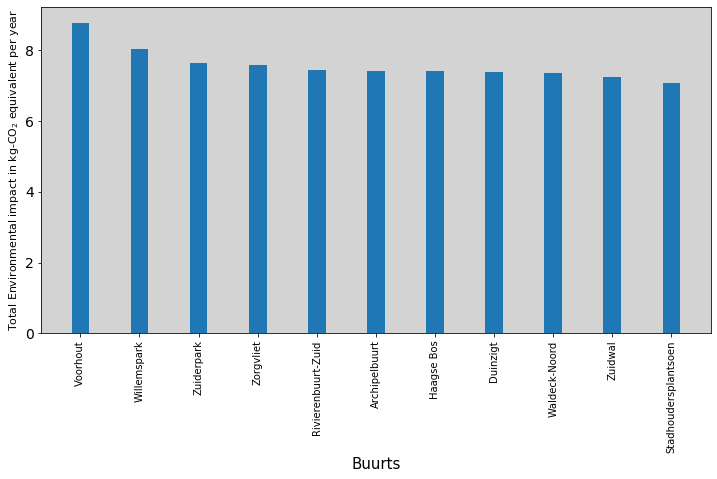

In [13]:
water_lci = water_lci.sort_values(by=['GWP per capita'],ascending=False)
water_lci = water_lci.reset_index(drop=True)
buurts = water_lci.loc[0:10,'Name']
env_impact = water_lci.loc[0:10,'GWP per capita']
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.bar(buurts,env_impact,width=0.3)
plt.xlabel('Buurts',fontsize=15)
plt.ylabel(r'Total Environmental impact in kg-CO$_2$ equivalent per year',fontsize=11)
#plt.ylim(0,1300)
#plt.xlim(0,20)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')

In [17]:
env_impacts = ['GWP per capita']
curr_impact = 0
averaged_impact = []
population = 0
for impact in env_impacts:
    for i in range(0,len(water_lci)):
        curr_impact = curr_impact + (water_lci.loc[i,impact]*water_lci.loc[i,'Population'])
        population = population + water_lci.loc[i,'Population']
    average = curr_impact/population
    averaged_impact.append(average)
    curr_impact=0
    population = 0

In [18]:
averaged_impact

[5.692949189140509]